# Implementation on Qibo

### First way, build up the trotter decomposition directly from the Hamiltonian

#### Imports

In [1]:
from qibo import hamiltonians, models
from qibo.hamiltonians import SymbolicHamiltonian
from qibo.symbols import X, Y,Z,I
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_qubits=6
data_onebody=np.load('data/matrix_elements_h_eff_2body/one_body_nn_sd.npz')
keys=data_onebody['keys']
values=data_onebody['values']

t_onebody={}

for a,key in enumerate(keys):
    i,j=key
    # we redefine the new order of qubits (following qibo and qiskit)
    t_onebody[(n_qubits-i-1,n_qubits-j-1)]=values[a]
    if i==j:
        print(values[a])
print(t_onebody)


-9.3151
-8.8615
-9.145
-8.107099999999999
3.2251000000000003
3.2251000000000003
{(np.int64(5), np.int64(5)): np.float64(-9.3151), (np.int64(5), np.int64(4)): np.float64(0.6897999999999996), (np.int64(5), np.int64(3)): np.float64(-0.4062999999999996), (np.int64(5), np.int64(2)): np.float64(-0.900781889989654), (np.int64(5), np.int64(1)): np.float64(-1.9314456782406446), (np.int64(5), np.int64(0)): np.float64(0.6017349640876247), (np.int64(4), np.int64(5)): np.float64(0.6897999999999996), (np.int64(4), np.int64(4)): np.float64(-8.8615), (np.int64(4), np.int64(3)): np.float64(0.8598999999999998), (np.int64(4), np.int64(2)): np.float64(0.900781889989654), (np.int64(4), np.int64(1)): np.float64(1.1336192497488327), (np.int64(4), np.int64(0)): np.float64(-1.3995613925794368), (np.int64(3), np.int64(5)): np.float64(-0.4062999999999996), (np.int64(3), np.int64(4)): np.float64(0.8598999999999998), (np.int64(3), np.int64(3)): np.float64(-9.145), (np.int64(3), np.int64(2)): np.float64(-0.90078188

#### Define the $H_Q$ Hamiltonian

In [3]:
terms = []

for (i,j),value in t_onebody.items():
    if i!=j:    
        terms.append(0.25*value * (Y(i) * Y(j)))
        terms.append(0.25*value *X(i)*X(j))

    elif i==j:
        # we convert the projector from Z+I to I-Z, because in qibo our 1 is 0 and viceversa
        terms.append(0.5*value*(-1*Z(i)+I(i)))
        

[Qibo 0.2.18|INFO|2025-05-12 17:23:57]: Using numpy backend on /CPU:0


In [4]:
form=sum(terms)

print(form)

0.225225*X0*X1 + 0.179428345726086*X0*X2 + 0.449618651706336*X0*X3 - 0.349890348144859*X0*X4 + 0.150433741021906*X0*X5 + 0.225225*X1*X0 - 0.179428345726086*X1*X2 - 0.183676508875732*X1*X3 + 0.283404812437208*X1*X4 - 0.482861419560161*X1*X5 + 0.179428345726086*X2*X0 - 0.179428345726086*X2*X1 - 0.225195472497414*X2*X3 + 0.225195472497414*X2*X4 - 0.225195472497414*X2*X5 + 0.449618651706336*X3*X0 - 0.183676508875732*X3*X1 - 0.225195472497414*X3*X2 + 0.214975*X3*X4 - 0.101575*X3*X5 - 0.349890348144859*X4*X0 + 0.283404812437208*X4*X1 + 0.225195472497414*X4*X2 + 0.214975*X4*X3 + 0.17245*X4*X5 + 0.150433741021906*X5*X0 - 0.482861419560161*X5*X1 - 0.225195472497414*X5*X2 - 0.101575*X5*X3 + 0.17245*X5*X4 + 0.225225*Y0*Y1 + 0.179428345726086*Y0*Y2 + 0.449618651706336*Y0*Y3 - 0.349890348144859*Y0*Y4 + 0.150433741021906*Y0*Y5 + 0.225225*Y1*Y0 - 0.179428345726086*Y1*Y2 - 0.183676508875732*Y1*Y3 + 0.283404812437208*Y1*Y4 - 0.482861419560161*Y1*Y5 + 0.179428345726086*Y2*Y0 - 0.179428345726086*Y2*Y1 - 

In [5]:
hamiltonian_qq=SymbolicHamiltonian(form=form,nqubits=n_qubits)


In [6]:
print(hamiltonian_qq.matrix)

[Qibo 0.2.18|WARNING|2025-05-12 17:24:02]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


[[  0.    +0.j   0.    +0.j   0.    +0.j ...   0.    +0.j   0.    +0.j
    0.    +0.j]
 [  0.    +0.j  -9.3151+0.j   0.6898+0.j ...   0.    +0.j   0.    +0.j
    0.    +0.j]
 [  0.    +0.j   0.6898+0.j  -8.8615+0.j ...   0.    +0.j   0.    +0.j
    0.    +0.j]
 ...
 [  0.    +0.j   0.    +0.j   0.    +0.j ... -20.117 +0.j   0.6898+0.j
    0.    +0.j]
 [  0.    +0.j   0.    +0.j   0.    +0.j ...   0.6898+0.j -19.6634+0.j
    0.    +0.j]
 [  0.    +0.j   0.    +0.j   0.    +0.j ...   0.    +0.j   0.    +0.j
  -28.9785+0.j]]


In [7]:
from scipy.sparse import csr_matrix



for i in range(1,n_qubits+1):
    for j in range(1,n_qubits+1):
        
        print(f'i={(i-1)},j={(j-1)} ->{csr_matrix(hamiltonian_qq.matrix)[2**(i-1),2**(j-1)]} \n')
        
### We got exactly the same Hamiltonian!

i=0,j=0 ->(-9.3151+0j) 

i=0,j=1 ->(0.6897999999999996+0j) 

i=0,j=2 ->(-0.4062999999999996+0j) 

i=0,j=3 ->(-0.900781889989654+0j) 

i=0,j=4 ->(-1.9314456782406446+0j) 

i=0,j=5 ->(0.6017349640876247+0j) 

i=1,j=0 ->(0.6897999999999996+0j) 

i=1,j=1 ->(-8.8615+0j) 

i=1,j=2 ->(0.8598999999999998+0j) 

i=1,j=3 ->(0.900781889989654+0j) 

i=1,j=4 ->(1.1336192497488327+0j) 

i=1,j=5 ->(-1.3995613925794368+0j) 

i=2,j=0 ->(-0.4062999999999996+0j) 

i=2,j=1 ->(0.8598999999999998+0j) 

i=2,j=2 ->(-9.145+0j) 

i=2,j=3 ->(-0.900781889989654+0j) 

i=2,j=4 ->(-0.7347060355029268+0j) 

i=2,j=5 ->(1.7984746068253425+0j) 

i=3,j=0 ->(-0.900781889989654+0j) 

i=3,j=1 ->(0.900781889989654+0j) 

i=3,j=2 ->(-0.900781889989654+0j) 

i=3,j=3 ->(-8.107099999999999+0j) 

i=3,j=4 ->(-0.7177133829043456+0j) 

i=3,j=5 ->(0.7177133829043456+0j) 

i=4,j=0 ->(-1.9314456782406446+0j) 

i=4,j=1 ->(1.1336192497488327+0j) 

i=4,j=2 ->(-0.7347060355029268+0j) 

i=4,j=3 ->(-0.7177133829043456+0j) 

i=4,j=4 ->(3.225100

#### Get the driver Hamiltonian

In [8]:
terms = []

external_field_coupling_o18=-9.3151

terms.append(0.5*external_field_coupling_o18*(-1*Z(n_qubits-1)+I(n_qubits-1)))


form=sum(terms)
print(form)

hamiltonian_driver=SymbolicHamiltonian(form=form,nqubits=n_qubits)



-4.65755*(I5 - Z5)


In [9]:
from scipy.sparse import csr_matrix



for i in range(1,n_qubits+1):
    for j in range(1,n_qubits+1):
        
        print(f'i={(i-1)},j={(j-1)} ->{csr_matrix(hamiltonian_driver.matrix)[2**(i-1),2**(j-1)]} \n')

[Qibo 0.2.18|WARNING|2025-05-12 17:24:18]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


i=0,j=0 ->(-9.3151+0j) 

i=0,j=1 ->0j 

i=0,j=2 ->0j 

i=0,j=3 ->0j 

i=0,j=4 ->0j 

i=0,j=5 ->0j 

i=1,j=0 ->0j 

i=1,j=1 ->0j 

i=1,j=2 ->0j 

i=1,j=3 ->0j 

i=1,j=4 ->0j 

i=1,j=5 ->0j 

i=2,j=0 ->0j 

i=2,j=1 ->0j 

i=2,j=2 ->0j 

i=2,j=3 ->0j 

i=2,j=4 ->0j 

i=2,j=5 ->0j 

i=3,j=0 ->0j 

i=3,j=1 ->0j 

i=3,j=2 ->0j 

i=3,j=3 ->0j 

i=3,j=4 ->0j 

i=3,j=5 ->0j 

i=4,j=0 ->0j 

i=4,j=1 ->0j 

i=4,j=2 ->0j 

i=4,j=3 ->0j 

i=4,j=4 ->0j 

i=4,j=5 ->0j 

i=5,j=0 ->0j 

i=5,j=1 ->0j 

i=5,j=2 ->0j 

i=5,j=3 ->0j 

i=5,j=4 ->0j 

i=5,j=5 ->0j 



In [ ]:
#### We initialize the state and we double check if the evolution is only into this subspace (it conserves the number)

In [10]:
from qibo import models
from qibo.models import AdiabaticEvolution
from qibo.callbacks import Energy

initial_state=np.zeros(2**n_qubits)
initial_state[1]=1 #### localized in the largest |m| and j quasiparticle

h0=hamiltonian_driver
h1=hamiltonian_qq

# scheduler
s= lambda t: t
tf=10

energy=Energy(hamiltonian_qq)

evolution=AdiabaticEvolution(
    h0,
    h1,
    s,
    dt=0.1,
    callbacks=[energy]
)

final_state=evolution(final_time=tf)

#### Exact time evolution 


[np.float64(-9.3151), np.float64(-9.3151), np.float64(-9.320018673037538), np.float64(-9.335591860100807), np.float64(-9.358943970802443), np.float64(-9.381131701995914), np.float64(-9.394378477620194), np.float64(-9.398137387576869), np.float64(-9.399259820216098), np.float64(-9.40635917030382), np.float64(-9.423034335387579), np.float64(-9.445342447747583), np.float64(-9.465319229353415), np.float64(-9.477441909563941), np.float64(-9.48271568269462), np.float64(-9.487264854588547), np.float64(-9.496972414821974), np.float64(-9.512872680717608), np.float64(-9.531050495546259), np.float64(-9.546699698511079), np.float64(-9.558413796563615), np.float64(-9.568858767783379), np.float64(-9.581524788267348), np.float64(-9.596939470634455), np.float64(-9.612121463769947), np.float64(-9.623814805400508), np.float64(-9.632269034722455), np.float64(-9.641674118806048), np.float64(-9.656540545308209), np.float64(-9.67733258162387), np.float64(-9.699595378607794), np.float64(-9.717626355831726), 

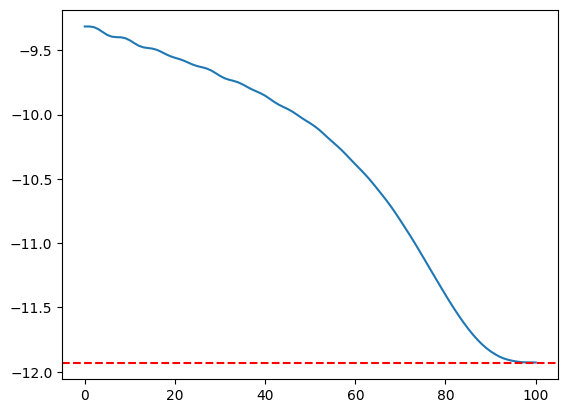

0.00029919505758147055


In [11]:
egs=-11.93178825
print(energy[:])
time=np.linspace(0,tf)
plt.plot(energy[:])
plt.axhline(y=egs,color='red',linestyle='--')
plt.show()

print(np.abs(egs-energy[-1])/np.abs(egs))


#### Using a trotter decomposition of gates in a quantum circuit

In [29]:
tf=10
time_steps=100
time=np.linspace(0,tf,time_steps)
scheduler=1.2*time/tf-0.2*(time/tf)**2

for i,t in enumerate(time):
    
    hamiltonian_t=hamiltonian_driver*(1-scheduler[i])+scheduler[i]*hamiltonian_qq
    if i==0:
        circuit=hamiltonian_t.circuit(dt=tf/time_steps)
    else:
        circuit+=(hamiltonian_t.circuit(dt=tf/time_steps))
    

In [30]:
final_state_clean=circuit(initial_state)

In [31]:
e_trotterize=hamiltonian_qq.expectation(state=final_state_clean.state())

In [32]:
print(np.abs((e_trotterize-egs)/egs))

0.0004044160052220449


#### Simulate with noise

We need to build the circuit in a different way, because we need to implement

In [ ]:
from qibo.hamiltonians.terms import TermGroup
from qibo import Circuit,gates
from itertools import chain

def create_a_circuit_from_hamiltonian_with_noise(hamiltonian,dt,accelerators=None):
    
    groups=TermGroup.from_terms(hamiltonian.terms)
    circuit=Circuit(hamiltonian.nqubits,accelerators=accelerators,density_matrix=True)
    circuit.add(group.term.expgate(dt/2.0) for group in chain(groups,groups[::-1]))
    
    return circuit




In [42]:
tf=10
time_steps=100
time=np.linspace(0,tf,time_steps)
scheduler=1.*time/tf-0.*(time/tf)**2

circuit=Circuit(nqubits=n_qubits,density_matrix=True)
circuit.add(gate=gates.X(n_qubits-1))

for i,t in enumerate(time):
    
    hamiltonian_t=hamiltonian_driver*(1-scheduler[i])+scheduler[i]*hamiltonian_qq

    circuit+=create_a_circuit_from_hamiltonian_with_noise(hamiltonian=hamiltonian_t,dt=tf/time_steps)

In [43]:
from qibo import Circuit, gates
from qibo.noise import IBMQNoiseModel

parameters = {
    "t1": {"0": 250*1e-06, "1": 240*1e-06},
    "t2": {"0": 150*1e-06, "1": 160*1e-06},
    "gate_times" : (200*1e-9, 400*1e-9),
    "excited_population" : 0,
    "depolarizing_one_qubit" : 4.000e-4,
    "depolarizing_two_qubit": 1.500e-4,
    "readout_one_qubit" : {"0": (0.022, 0.034), "1": (0.015, 0.041)},
    }

noise_model = IBMQNoiseModel()
noise_model.from_dict(parameters)
noisy_circuit = noise_model.apply(circuit)



In [44]:


final_state=noisy_circuit()





In [45]:
energy_noise=hamiltonian_qq.expectation(final_state.state())

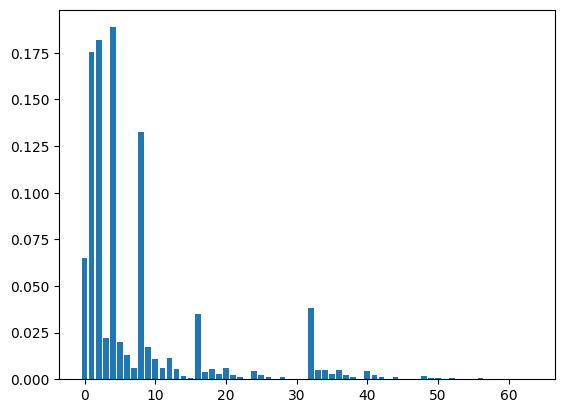

In [46]:
plt.bar(x=np.arange(2**n_qubits),height=np.diag(final_state.state()))
plt.show()




In [47]:
print(np.abs((energy_noise-egs)/egs))

0.04254650861183573


##### What if we remove basis term outside the single particle space?

1
2
4
8
16
32


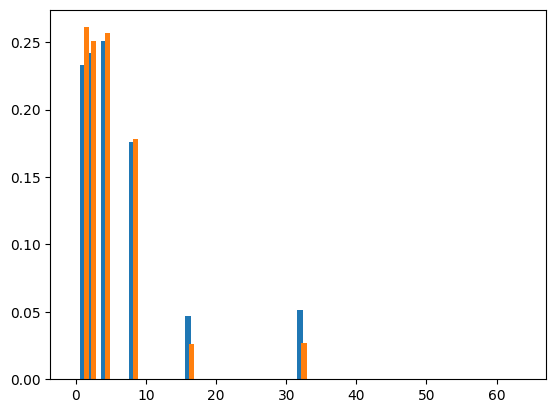

0.9054631780295144
0.6808698540396914


In [48]:
from qibo.quantum_info import fidelity

sp_density_matrix=np.zeros((2**n_qubits,2**n_qubits),dtype=np.complex128)

for i in range(1,n_qubits+1):
    print(2**(i-1))
    for j in range(1,n_qubits+1):

        sp_density_matrix[2**(i-1),2**(j-1)]=final_state.state()[2**(i-1),2**(j-1)]

sp_density_matrix_normalized=sp_density_matrix/np.trace(sp_density_matrix)

plt.bar(x=np.arange(2**n_qubits),height=np.diag(sp_density_matrix_normalized))
plt.bar(x=np.arange(2**n_qubits)+0.5,height=final_state_clean.state().conjugate()*final_state_clean.state())
plt.show()

final_state_clean_densitymatrix=np.outer(final_state_clean.state().conjugate(),final_state_clean.state())

print(fidelity(sp_density_matrix_normalized,final_state_clean_densitymatrix))
print(fidelity(final_state.state(),final_state_clean_densitymatrix))


In [88]:
print(hamiltonian_qq.expectation(state=sp_density_matrix_normalized))



-11.820405093953408


#### What if we consider the error correction?

In [67]:
tf=10
time_steps=100
time=np.linspace(0,tf,time_steps)
scheduler=time/tf

circuit=Circuit(n_qubits,density_matrix=True)
# we initialize the state
circuit.add(gate=gates.X(5))
circuit.draw()
for i,t in enumerate(time):
    
    hamiltonian_t=hamiltonian_driver*(1-scheduler[i])+scheduler[i]*hamiltonian_qq
    if i==0:
        circuit+=create_a_circuit_from_hamiltonian_with_noise(hamiltonian=hamiltonian_t,dt=tf/time_steps)
    else:
        circuit+=create_a_circuit_from_hamiltonian_with_noise(hamiltonian=hamiltonian_t,dt=tf/time_steps)

#circuit.add(gates.M(*range(n_qubits)))

circuit.draw()
    


0: ───
1: ───
2: ───
3: ───
4: ───
5: ─X─
0:     ───────U───────U───U─U─U─────────────────────────U─U─U───U───────U─U── ...
1:     ───────U─U─────|───|─|─|───────U─U─U─U─U─U───────|─|─|───|─────U─U─U─U ...
2:     ─────────|─────|─U─|─U─|───U─U─|─U─|─|─U─|─U─U───|─U─|─U─|─────|─────| ...
3:     ─────────|───U─U─|─|───|─U─U─|─|───U─U───|─|─U─U─|───|─|─U─U───|─────| ...
4:     ─────────U─U─U───U─|───U─|───|─|─────────|─|───|─U───|─U───U─U─U─────U ...
5:     ─X─U─U─────U───────U─────U───U─U─────────U─U───U─────U───────U──────── ...

0: ... ─────U───U─U─U─────────────────────────U─U─U───U───────U─U─────────U─U ...
1: ... ─────|───|─|─|───────U─U─U─U─U─U───────|─|─|───|─────U─U─|───────U─|─| ...
2: ... ─────|─U─|─U─|───U─U─|─U─|─|─U─|─U─U───|─U─|─U─|─────|───U─────U─|─|─| ...
3: ... ───U─U─|─|───|─U─U─|─|───U─U───|─|─U─U─|───|─|─U─U───|─────U───|─|─|─U ...
4: ... ─U─U───U─|───U─|───|─|─────────|─|───|─U───|─U───U─U─U─────U─U─U─U─|── ...
5: ... ─U───────U─────U───U─U─────────U─U───U─────U────

In [89]:
import numpy as np
from qibo.noise import NoiseModel, KrausError
from qibo import gates
from itertools import product

# Single-qubit Pauli matrices
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
paulis = [I, X, Y, Z]

def one_qubit_depolarizing_kraus(r1q):
    p = r1q
    K0 = np.sqrt(1 - 3 * p / 4) * I
    Ks = [K0] + [np.sqrt(p / 4) * P for P in [X, Y, Z]]
    return Ks

def two_qubit_depolarizing_kraus(r2q):
    p = r2q
    K00 = np.sqrt(1 - 15 * p / 16) * np.kron(I, I)
    Ks = [K00]
    for i in range(1, 4):
        for j in range(4):
            Kij = np.sqrt(p / 16) * np.kron(paulis[i], paulis[j])
            Ks.append(Kij)
    return Ks

# Example: Aria 1 noise parameters
r1q = 0.0005
r2q = 0.0133

noise = NoiseModel()

# Add noise to all 1-qubit gates
noise.add(KrausError(one_qubit_depolarizing_kraus(r1q)), qubits=1)

# Add noise to all 2-qubit gates
noise.add(KrausError(two_qubit_depolarizing_kraus(r2q)), qubits=2)

In [90]:
from qibo import Circuit, gates

import qibo
from qibo.backends import NumpyBackend




noisy_circuit = noise.apply(circuit)



In [91]:
noisy_circuit.draw()

0:     ───────U───────────U───U─U─U─────────────────────────────────────U─U─U ...
1:     ───────U─K─U─K─────|───|─|─|───────U─K─U─K─U─K─U─K─U─K─U─K───────|─|─| ...
2:     ───────────|───────|─U─|─U─|───U─U─|───U───|───|───U───|───U─U───|─U─| ...
3:     ───────────|─────U─U─|─|───|─U─U─|─|───────U───U───────|───|─U─U─|───| ...
4:     ───────────U───U─U───U─|───U─|───|─|───────────────────|───|───|─U───| ...
5:     ─X─U─U─────────U───────U─────U───U─U───────────────────U───U───U─────U ...

0: ... ───U─────────U───U───────────U───U─U─U──────────────────────────────── ...
1: ... ───|─────U─K─U─K─U─K─U─K─────|───|─|─|───────U─K─U─K─U─K─U─K─U─K─U─K── ...
2: ... ─U─|─────|───────────|───────|─U─|─U─|───U─U─|───U───|───|───U───|───U ...
3: ... ─|─U─U───|───────────|─────U─U─|─|───|─U─U─|─|───────U───U───────|───| ...
4: ... ─U───U─U─U───────────U───U─U───U─|───U─|───|─|───────────────────|───| ...
5: ... ───────U─────────────────U───────U─────U───U─U───────────────────U───U ...

0: ... ─────U─

In [92]:
for gate in noisy_circuit.queue:
    print(gate)

In [93]:
final_state=noisy_circuit()

In [94]:
energy_noise=hamiltonian_qq.expectation(final_state.state())
print(energy_noise)
print(np.abs((energy_noise-egs)/egs))

-10.970764656777078
0.08054313176592974


/opt/anaconda3/envs/qutip_env/lib/python3.10/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/qutip_env/lib/python3.10/site-packages/matplotlib/transforms.py:757: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


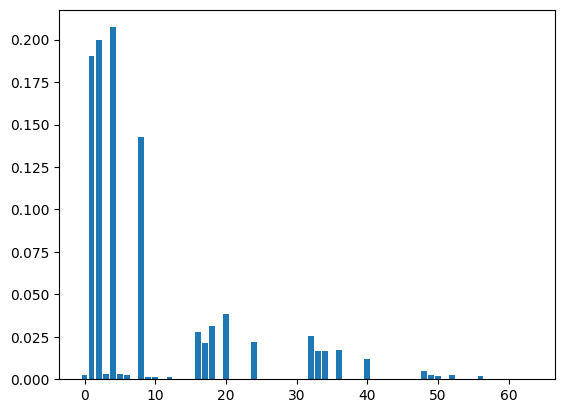

In [95]:
plt.bar(x=np.arange(2**n_qubits),height=np.diag(final_state.state()))
plt.show()


1
2
4
8
16
32


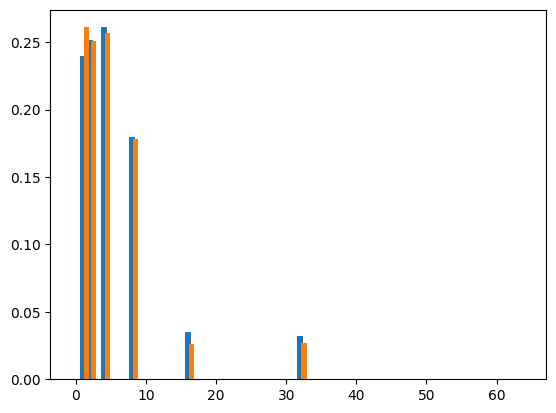

0.9908725672061774
0.7865286270809374


In [96]:
from qibo.quantum_info import fidelity

sp_density_matrix=np.zeros((2**n_qubits,2**n_qubits),dtype=np.complex128)

for i in range(1,n_qubits+1):
    print(2**(i-1))
    for j in range(1,n_qubits+1):

        sp_density_matrix[2**(i-1),2**(j-1)]=final_state.state()[2**(i-1),2**(j-1)]

sp_density_matrix_normalized=sp_density_matrix/np.trace(sp_density_matrix)

plt.bar(x=np.arange(2**n_qubits),height=np.diag(sp_density_matrix_normalized))
plt.bar(x=np.arange(2**n_qubits)+0.5,height=final_state_clean.state().conjugate()*final_state_clean.state())
plt.show()

final_state_clean_densitymatrix=np.outer(final_state_clean.state().conjugate(),final_state_clean.state())

print(fidelity(sp_density_matrix_normalized,final_state_clean_densitymatrix))
print(fidelity(final_state.state(),final_state_clean_densitymatrix))
